<a href="https://colab.research.google.com/github/ntust10733033/BRF_PriceCalculation/blob/master/%E5%85%B1%E6%95%B4%E5%90%88_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
!pip install arch

In [180]:
!pip install scipy -U

Requirement already up-to-date: scipy in /usr/local/lib/python3.7/dist-packages (1.6.3)


In [181]:
import matplotlib.pyplot as plt

In [182]:
import pandas as pd

In [183]:
from arch.unitroot import ADF,KPSS
import numpy as np

In [184]:
from scipy import stats

In [185]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BRF_RawData/df_2mon.csv",encoding='big5')

In [186]:
del df['Unnamed: 0']
df.columns = ['交易月份','到期月份','收盤價','交易年分','到期年分']

In [187]:
df

,交易月份,到期月份,收盤價,交易年分,到期年分
0,7,9,2381.5,2018,2018
1,7,9,2377.0,2018,2018
2,7,9,2381.5,2018,2018
3,7,9,2369.5,2018,2018
4,7,9,2361.0,2018,2018
...,...,...,...,...,...
594,12,2,1384.0,2020,2021
595,12,2,1449.0,2020,2021
596,12,2,1427.5,2020,2021
597,12,2,1436.5,2020,2021


In [155]:
#filter1 = df['交易月份']<=4

In [156]:
#filter2 = df['交易年分']==2019

In [157]:
#x = df[filter1 & filter2]['收盤價']
#x = df[filter2]['收盤價']

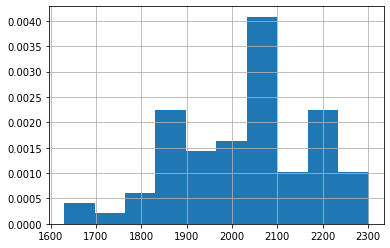

In [162]:
#x.hist(bins=10,density=True)

In [189]:
y1 = df[df['交易年分']==2018]['收盤價']
y2 = df[df['交易年分']==2019]['收盤價']
y3 = df[df['交易年分']==2020]['收盤價']

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


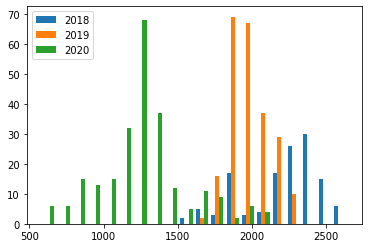

In [190]:
plt.hist([y1,y2,y3],bins=20,label=['2018','2019','2020'])
plt.legend(loc='upper left')

In [81]:
import statsmodels.stats.anova as anova
from statsmodels.formula.api import ols

In [82]:
fu_df = pd.concat([y1,y2,y3],ignore_index=True)
fu_df

0      2381.5
1      2377.0
2      2381.5
3      2369.5
4      2361.0
        ...  
594    1384.0
595    1449.0
596    1427.5
597    1436.5
598    1444.0
Name: 收盤價, Length: 599, dtype: float64

In [83]:
CPC_df = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/BRF_RawData/中油95_201807_202104.xlsx")

In [84]:
CPC_df = CPC_df.iloc[:30]
CPC_df = CPC_df['數值']

In [85]:
mon_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/BRF_RawData/中油月均價 - 工作表1.csv")

In [86]:
mon_df = mon_df['每公升價格']

In [87]:
df = pd.concat([mon_df.rename('BRF'),CPC_df.rename('CPC95')],axis=1,ignore_index=True)

In [88]:
df.columns=['BRF','CPC95']

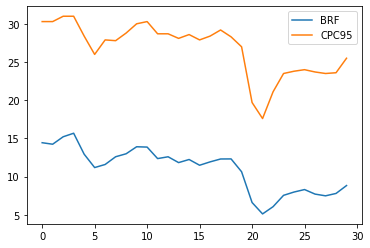

In [89]:
df.plot()

BRF跟中油95 (價格/公升)=>看起來趨勢一致


In [90]:
CPCf = df['CPC95']
BRFf = df['BRF']

In [91]:
CPCf_log = np.log(CPCf)
BRFf_log = np.log(BRFf) 

In [92]:
adf_CPC = ADF(CPCf_log)
adf_BRF = ADF(BRFf_log)

In [93]:
print(adf_BRF.summary(),adf_CPC.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.481
P-value                         0.543
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.70 (1%), -2.98 (5%), -2.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.    Augmented Dickey-Fuller Results   
Test Statistic                 -2.451
P-value                         0.128
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.69 (1%), -2.97 (5%), -2.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


無法拒絕虛無假說=>存在單根=>兩者的對數價格皆為非定態，有一定的趨勢


In [94]:
#要取[1:]是因為第一項不存在於前一項的差分，會變成NaN
ret_CPC = CPCf_log.diff()[1:]
ret_BRF = BRFf_log.diff()[1:]

In [95]:
adf_ret_CPC = ADF(ret_CPC)
adf_ret_BRF = ADF(ret_BRF)
print(adf_ret_BRF.summary(),adf_ret_CPC.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.776
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.70 (1%), -2.98 (5%), -2.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.    Augmented Dickey-Fuller Results   
Test Statistic                 -4.604
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.70 (1%), -2.98 (5%), -2.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


拒絕虛無假說=>不存在單根=>兩者差分(收益率、一階整合序列)皆為定態

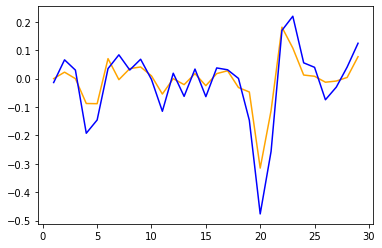

In [163]:
ret_CPC.plot(label='CPC95',style='orange')
ret_BRF.plot(label='BRF',style='blue')

# 跑迴歸
在了解對數價格的差分序列是定態後，再來看是否存在共整合
=>看兩者對數價格差是否為定態


$log(P^Y_{t}) = \alpha +\beta \space log(P^X_{t})+\varepsilon_{t}$

$\rightarrow \varepsilon_{t} = log(P^Y_{t})-\alpha +\beta \space log(P^X_{t}) $

檢定一下$\varepsilon_{t}$是否為定態

In [164]:
import statsmodels.api as sm

In [167]:
model =sm.OLS(CPCf_log,sm.add_constant(BRFf_log))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  CPC95   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     574.5
Date:                Sat, 08 May 2021   Prob (F-statistic):           3.35e-20
Time:                        08:48:40   Log-Likelihood:                 63.074
No. Observations:                  30   AIC:                            -122.1
Df Residuals:                      28   BIC:                            -119.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1983      0.045     48.438      0.0

In [170]:
alpha,beta = result.params
alpha,beta

(2.1983454451516833, 0.4579678324923272)

In [172]:
spread = CPCf_log -beta*BRFf_log - alpha

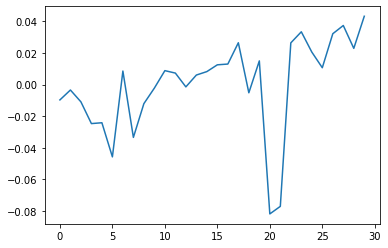

In [175]:
spread.plot()

In [177]:
adfSpread = ADF(spread,trend='nc')
print(adfSpread.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.194
P-value                         0.001
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.65 (1%), -1.95 (5%), -1.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/usr/local/lib/python3.7/dist-packages/arch/unitroot/unitroot.py:470: FutureWarning: Trend "nc" is deprecated and has been replaced with "n" (for none).
  FutureWarning,


拒絕虛無假說=>對數價格差存在定態，有共整合
